## 1. Executive Summary

The house pricing project focuses on predicting sale prices using features related to area (total area, lot shape, neighbourhood), house condition (quality and overall condition), house structure (basement, exterior, number of floors), and sale-related attributes (sale condition and year of sale). Given the large number of features involved, data cleaning and feature engineering were carried out with basic domain understanding. A detailed data dictionary was created and used throughout the analysis to ensure that feature definitions and transformations were interpreted correctly.

## 2. Data Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/vjain/Downloads/archive (31)\AmesHousing.csv")

In [3]:
df = df.drop(columns = {'Order', 'PID', 'MS SubClass',
                        'Roof Matl', 'Heating', 'Low Qual Fin SF',
                        'Pool Area', 'Pool QC', 'Fence',
                        'Misc Feature', 'Misc Val', 'Mo Sold'
                       }
            )
    

In [4]:
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,P,210,62,0,0,0,2010,WD,Normal,215000
1,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,Y,140,0,0,0,120,2010,WD,Normal,105000
2,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,Y,393,36,0,0,0,2010,WD,Normal,172000
3,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,0,0,0,0,2010,WD,Normal,244000
4,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,Y,212,34,0,0,0,2010,WD,Normal,189900


In [5]:
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    return percent_nan.sort_values(ascending=False)

percent_missing(df)

Alley            93.242321
Mas Vnr Type     60.580205
Fireplace Qu     48.532423
Lot Frontage     16.723549
Garage Yr Blt     5.426621
                   ...    
Foundation        0.000000
Heating QC        0.000000
Central Air       0.000000
1st Flr SF        0.000000
SalePrice         0.000000
Length: 70, dtype: float64

In [6]:
df = df.drop('Alley', axis=1)

In [7]:
#Replace NA with "None" for categorical features
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

In [8]:
df["Garage Type"] = df["Garage Type"].fillna("NoGarage")
df["Garage Finish"] = df["Garage Finish"].fillna("NoGarage")
df["Garage Qual"] = df["Garage Qual"].fillna("NoGarage")

In [9]:
neighborhood_medians = df.groupby("Neighborhood")["Lot Frontage"].median()

In [10]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(
    df["Neighborhood"].map(neighborhood_medians)
)

In [11]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

In [12]:
df["Garage Cond"] = df["Garage Cond"].fillna("NoGarage")

In [13]:
bsmt_cols = ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']

for col in bsmt_cols:
    df[col] = df[col].fillna("Nobsmt")

In [14]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [15]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(df["Lot Frontage"].median())

In [16]:
bsmt_cols1 = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2']

for col in bsmt_cols1:
    df[col] = df[col].fillna(0)

In [17]:
df['Electrical'] = df['Electrical'].fillna("None")

In [18]:
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)

In [19]:
df['Garage Cars'] = df['Garage Cars'].fillna(0)

In [20]:
df['Garage Area'] = df['Garage Area'].fillna(0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS Zoning       2930 non-null   object 
 1   Lot Frontage    2930 non-null   float64
 2   Lot Area        2930 non-null   int64  
 3   Street          2930 non-null   object 
 4   Lot Shape       2930 non-null   object 
 5   Land Contour    2930 non-null   object 
 6   Utilities       2930 non-null   object 
 7   Lot Config      2930 non-null   object 
 8   Land Slope      2930 non-null   object 
 9   Neighborhood    2930 non-null   object 
 10  Condition 1     2930 non-null   object 
 11  Condition 2     2930 non-null   object 
 12  Bldg Type       2930 non-null   object 
 13  House Style     2930 non-null   object 
 14  Overall Qual    2930 non-null   int64  
 15  Overall Cond    2930 non-null   int64  
 16  Year Built      2930 non-null   int64  
 17  Year Remod/Add  2930 non-null   i

In [22]:
# Automated check for comparing dictionary vs df dtypes

expected_types = {
    'object': [
        'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2',
        'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
        'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
        'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
        'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
        'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
        'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'
    ],
    'numeric': [
        'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
        'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
        '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
        'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
        'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
        '3Ssn Porch', 'Screen Porch', 'Yr Sold', 'SalePrice'
    ]
}

In [23]:
for col in expected_types['object']:
    if col in df.columns and df[col].dtype != 'object':
        print("❌ Should be object:", col, "but is", df[col].dtype)

for col in expected_types['numeric']:
    if col in df.columns and not pd.api.types.is_numeric_dtype(df[col]):
        print("❌ Should be numeric:", col, "but is", df[col].dtype)

In [24]:
df.duplicated().value_counts()

False    2930
Name: count, dtype: int64

## 3. Exploratory Data Analysis (EDA)

## 3A. Univariate Analysis

In [25]:
df.select_dtypes(include=['int64', 'float64']).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2930.0,69.47,21.72,21.0,60.00,70.0,80.00,313.0
Lot Area,2930.0,10147.92,7880.02,1300.0,7440.25,9436.5,11555.25,215245.0
Overall Qual,2930.0,6.09,1.41,1.0,5.00,6.0,7.00,10.0
Overall Cond,2930.0,5.56,1.11,1.0,5.00,5.0,6.00,9.0
Year Built,2930.0,1971.36,30.25,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.27,20.86,1950.0,1965.00,1993.0,2004.00,2010.0
Mas Vnr Area,2930.0,101.10,178.63,0.0,0.00,0.0,162.75,1600.0
BsmtFin SF 1,2930.0,442.48,455.59,0.0,0.00,370.0,734.00,5644.0
BsmtFin SF 2,2930.0,49.71,169.14,0.0,0.00,0.0,0.00,1526.0
Bsmt Unf SF,2930.0,559.07,439.54,0.0,219.00,465.5,801.75,2336.0


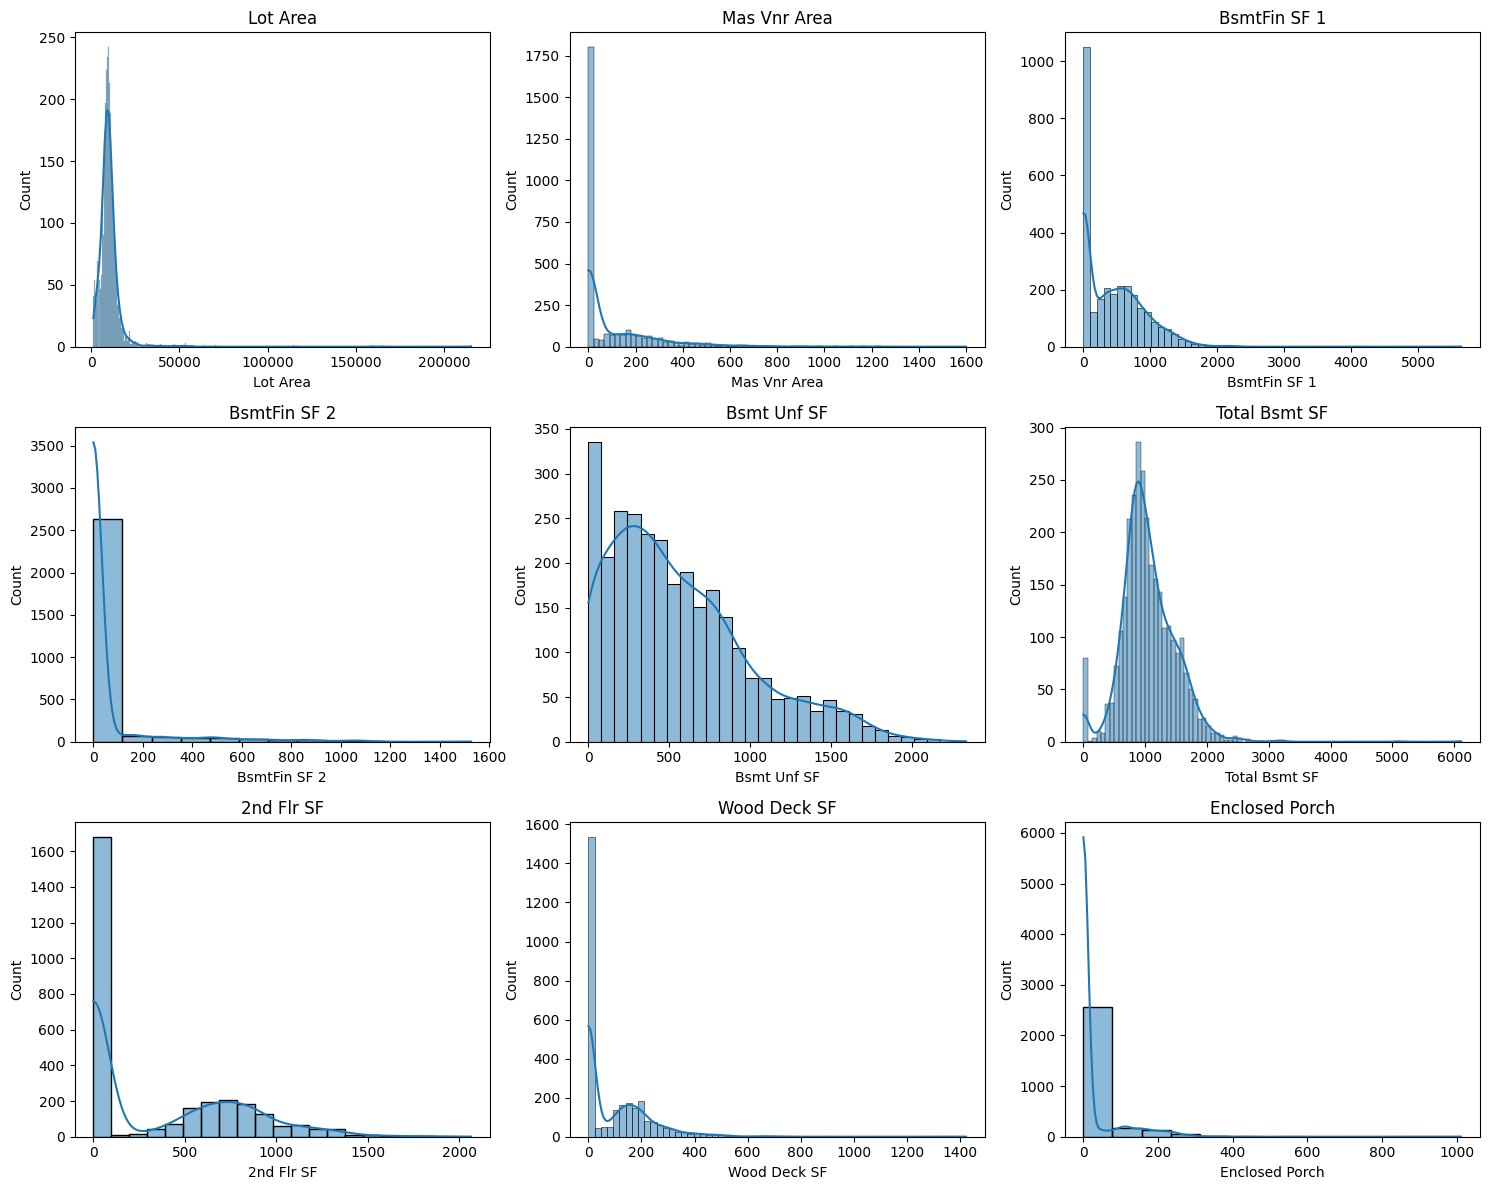

In [26]:
#Scan all histograms where problems were identified
cols = [
    "Lot Area", "Mas Vnr Area", "BsmtFin SF 1",
    "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF",
    "2nd Flr SF", "Wood Deck SF", "Enclosed Porch"
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [27]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print("\n====================")
    print(f"Value counts for: {col}\n")
    counts = df[col].value_counts()
    perc = (df[col].value_counts(normalize=True) * 100).round(2)

    print(pd.DataFrame({'count': counts, 'percent': perc}))


Value counts for: MS Zoning

           count  percent
MS Zoning                
RL          2273    77.58
RM           462    15.77
FV           139     4.74
RH            27     0.92
C (all)       25     0.85
I (all)        2     0.07
A (agr)        2     0.07

Value counts for: Street

        count  percent
Street                
Pave     2918    99.59
Grvl       12     0.41

Value counts for: Lot Shape

           count  percent
Lot Shape                
Reg         1859    63.45
IR1          979    33.41
IR2           76     2.59
IR3           16     0.55

Value counts for: Land Contour

              count  percent
Land Contour                
Lvl            2633    89.86
HLS             120     4.10
Bnk             117     3.99
Low              60     2.05

Value counts for: Utilities

           count  percent
Utilities                
AllPub      2927    99.90
NoSewr         2     0.07
NoSeWa         1     0.03

Value counts for: Lot Config

            count  percent
Lot Co

In [28]:
rare = ["Other", "RH"]
df["MS Zoning"] = df["MS Zoning"].replace(rare, "Other")

In [29]:
rare = ["Blmngtn", "Veenker", "NPkVill", "Blueste", "Greens", "GrnHill", "Landmrk"]
df["Neighborhood"] = df["Neighborhood"].replace(rare, "Other")

In [30]:
rare = ["Feedr", "Artery", "PosA", "PosN", "RRNn", "RRAe", "RRAn"]
df["Condition 2"] = df["Condition 2"].replace(rare, "Other")

In [31]:
rare = ["2.5Unf", "1.5Unf", "2.5Fin"]
df["House Style"] = df["House Style"].replace(rare, "Other_HouseStyle")

In [32]:
rare = ["Gambrel", "Flat", "Mansard", "Shed"]
df["Roof Style"] = df["Roof Style"].replace(rare, "Other_RoofStyle")

In [33]:
rare = ["BrkComm", "AsphShn", "CBlock", "Stone", "PreCast", "ImStucc"]
df["Exterior 1st"] = df["Exterior 1st"].replace(rare, "Other_extr1")

In [34]:
rare = ["ImStucc", "Stone", "AsphShn", "CBlock", "PreCast", "Other"]
df["Exterior 2nd"] = df["Exterior 2nd"].replace(rare, "Other_extr2")

In [35]:
rare = ["BrkCmn", "CBlock"]
df["Mas Vnr Type"] = df["Mas Vnr Type"].replace(rare, "masvnr_other")

In [36]:
rare = ["CWD", "ConLI", "ConLw", "Oth", "Con", "VWD"]
df["Sale Type"] = df["Sale Type"].replace(rare, "saletype_other")

## 3B. Bivariate and Multivariate Analysis

In [58]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select numeric columns (excluding target)
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice'])

# Add constant term
X_const = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Round to 2 decimals
vif["VIF"] = vif["VIF"].round(2)

vif

,feature,VIF
0,const,2368867.15
1,Lot Frontage,1.48
2,Lot Area,1.30
3,Overall Qual,3.15
4,Overall Cond,1.53
5,Year Built,3.82
6,Year Remod/Add,2.32
7,Mas Vnr Area,1.41
8,BsmtFin SF 1,inf
9,BsmtFin SF 2,inf


In [60]:
# getting rid of highly correlated columns

df = df.drop(columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                        '1st Flr SF', '2nd Flr SF', 'Garage Area']
            )
                        

In [62]:
corr_check = df.select_dtypes(include=['float64', 'int64'])

corr_check.corrwith(df['SalePrice'])

Lot Frontage      0.353417
Lot Area          0.266549
Overall Qual      0.799262
Overall Cond     -0.101697
Year Built        0.558426
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
Total Bsmt SF     0.632529
Gr Liv Area       0.706780
Bsmt Full Bath    0.275823
Bsmt Half Bath   -0.035817
Full Bath         0.545604
Half Bath         0.285056
Bedroom AbvGr     0.143913
Kitchen AbvGr    -0.119814
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Garage Yr Blt     0.253459
Garage Cars       0.647562
Wood Deck SF      0.327143
Open Porch SF     0.312951
Enclosed Porch   -0.128787
3Ssn Porch        0.032225
Screen Porch      0.112151
Yr Sold          -0.030569
SalePrice         1.000000
dtype: float64

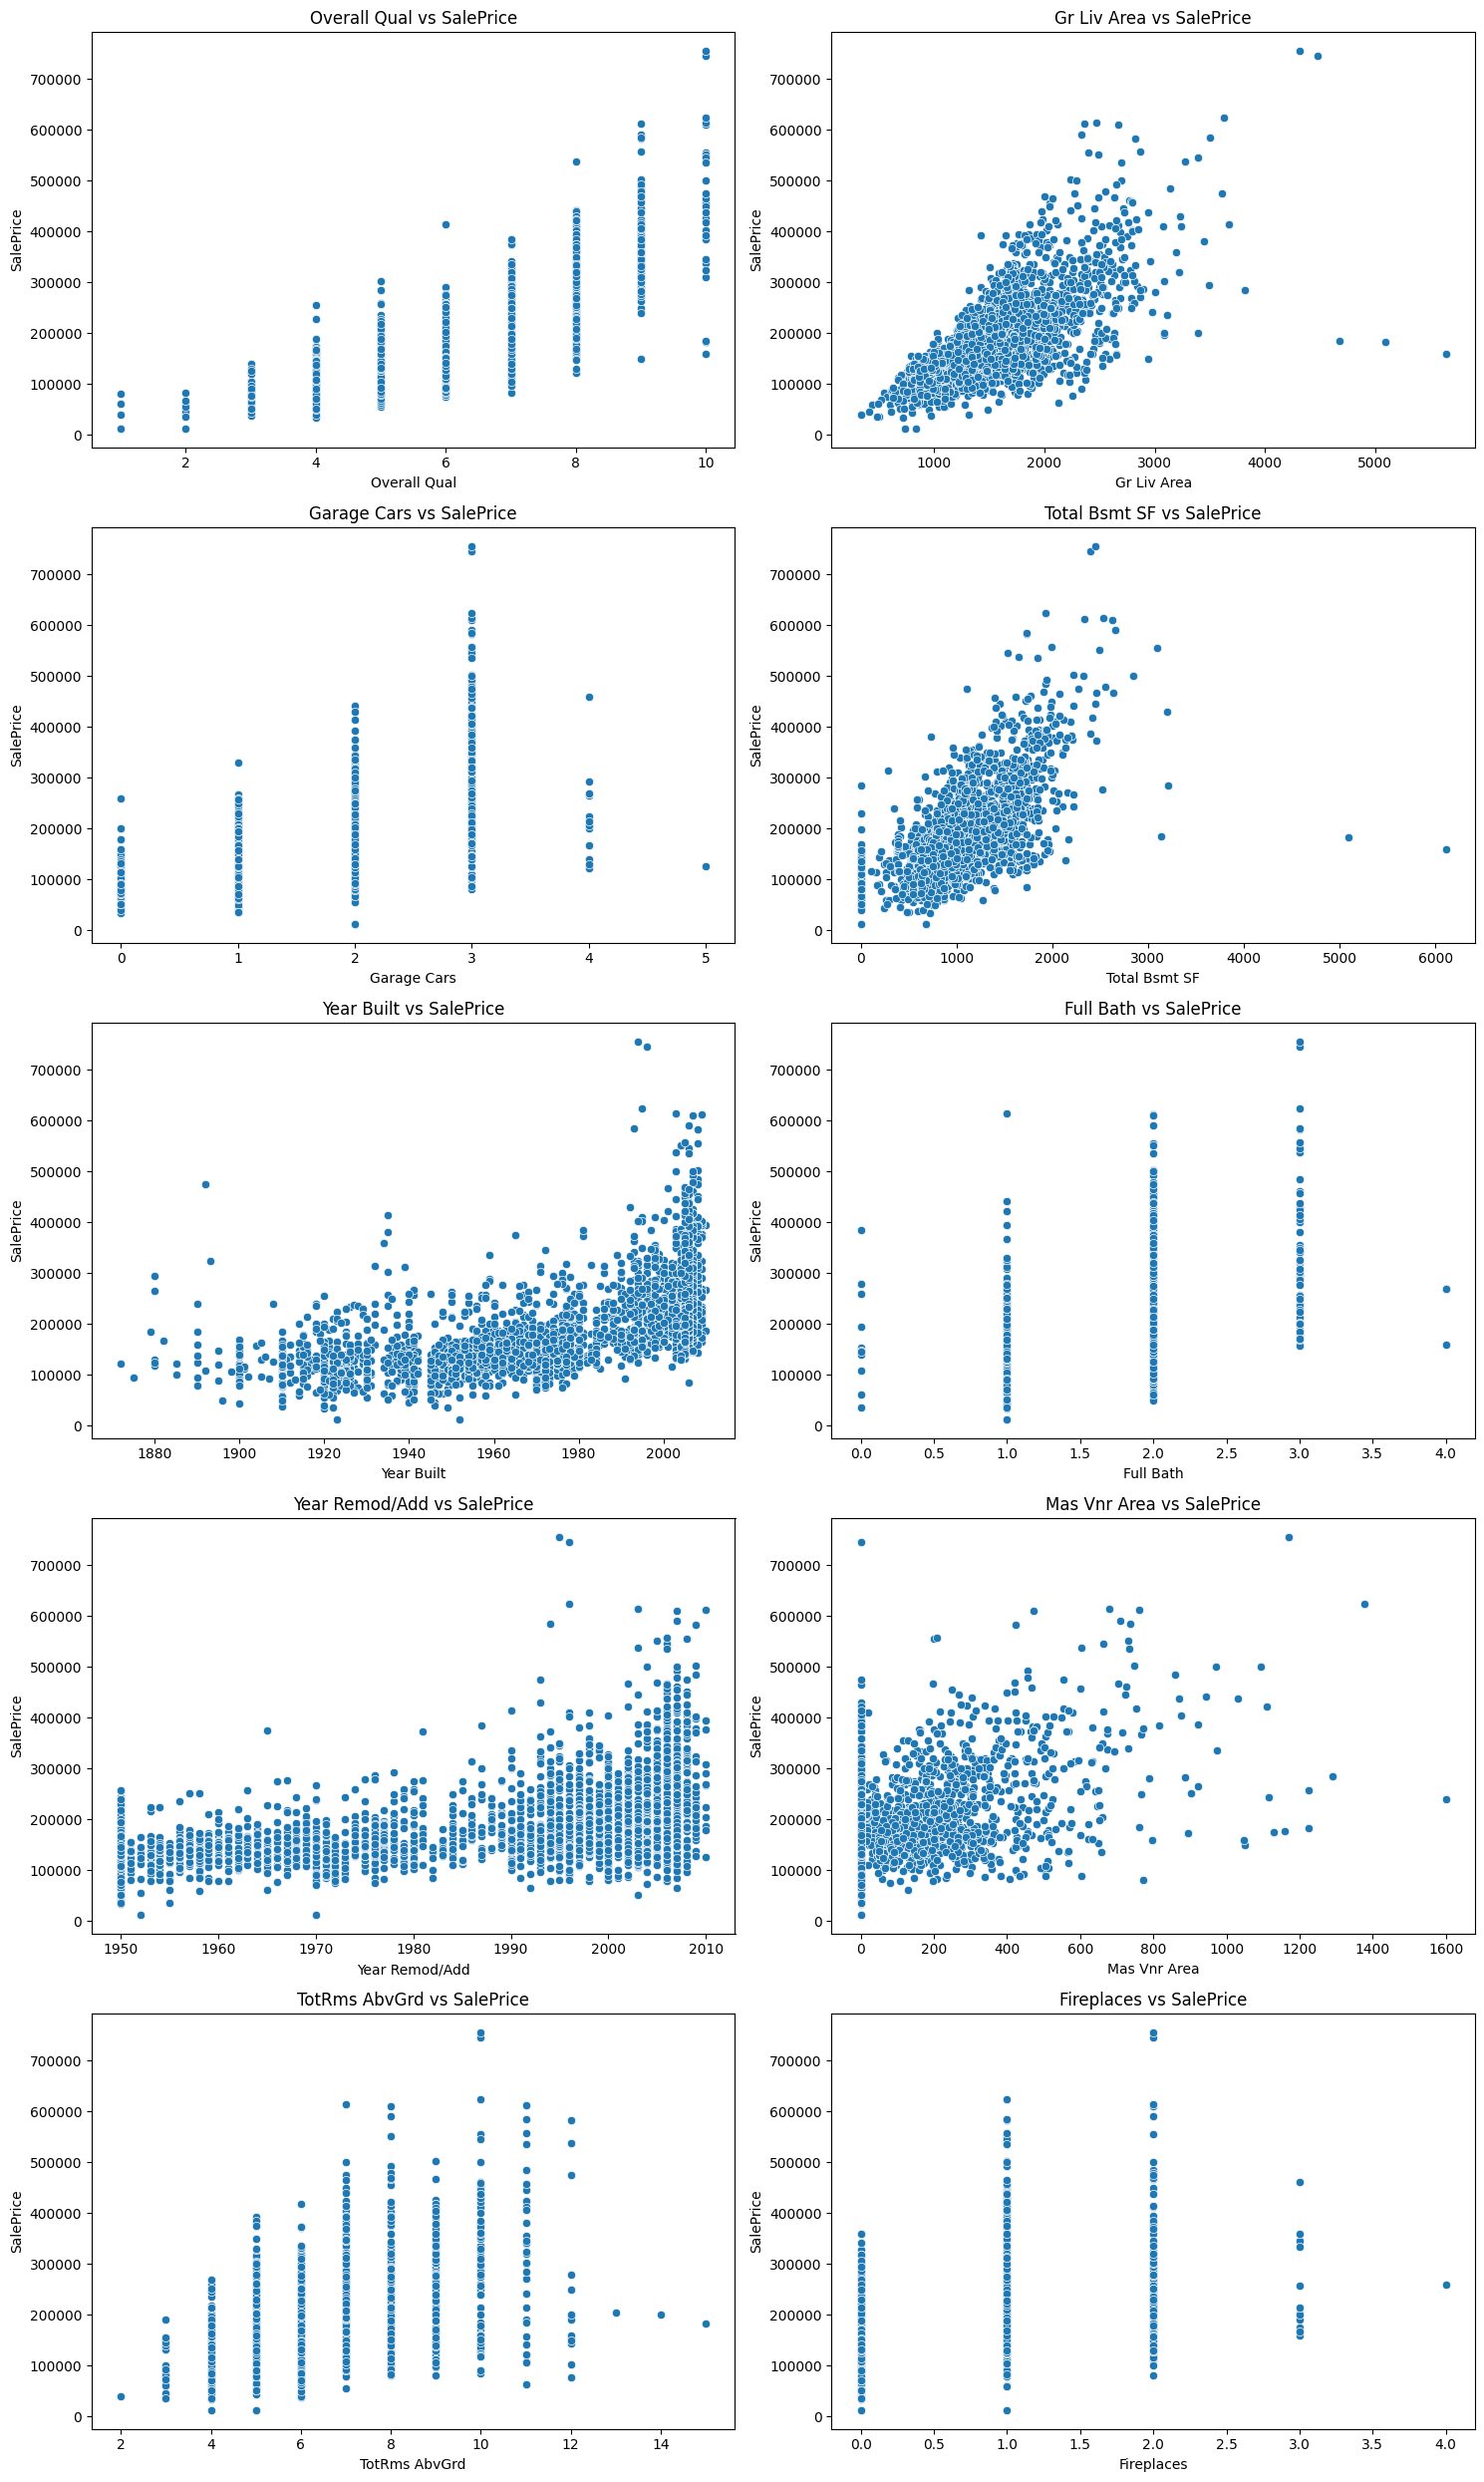

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = [
    'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
    'Year Built', 'Full Bath', 'Year Remod/Add', 'Mas Vnr Area',
    'TotRms AbvGrd', 'Fireplaces'
]

plt.figure(figsize=(15, 25))

for i, col in enumerate(top_features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.show()

In [66]:
# Remove outliers
df = df[~((df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000))]

In [68]:
# Remove outliers
df = df[~((df['Overall Qual'] == 10) & (df['SalePrice'] < 300000))]

In [70]:
# Remove outliers
df = df[~((df['Garage Cars'] == 5) & (df['SalePrice'] < 300000))]

In [72]:
df.shape

(2926, 63)

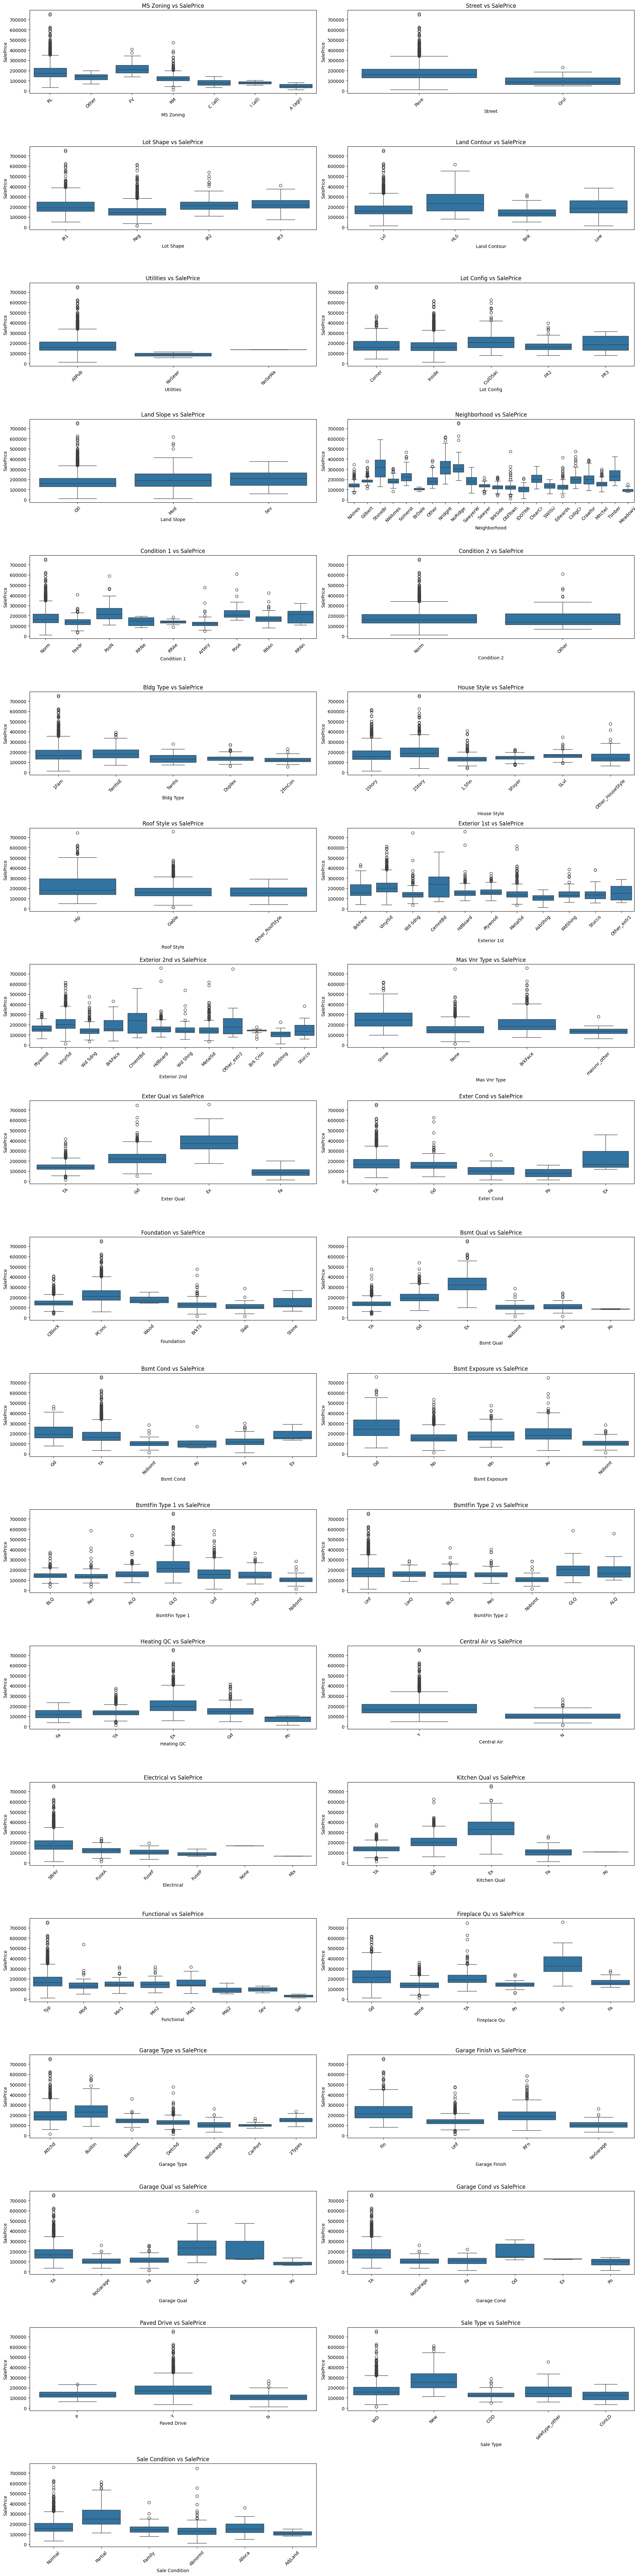

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = [
    'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
    'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2',
    'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
    'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
    'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
    'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
    'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'
]

plt.figure(figsize=(20, 80))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(19, 2, i)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f"{col} vs SalePrice")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [114]:
for col in cat_cols:
    print("\n==============================")
    print(f"Median SalePrice & Count by {col}:")

    summary = (
        df.groupby(col)['SalePrice']
          .agg(['median', 'count'])
          .sort_values('median')
    )

    print(summary)


Median SalePrice & Count by MS Zoning:
             median  count
MS Zoning                 
C (all)     71700.0     22
A (agr)     81500.0      1
I (all)    103000.0      1
RM         122000.0    443
Other      140000.0     27
RL         172500.0   2248
FV         208950.0    138

Median SalePrice & Count by Street:
          median  count
Street                 
Grvl     93850.0     11
Pave    162000.0   2869

Median SalePrice & Count by Lot Shape:
             median  count
Lot Shape                 
Reg        145400.0   1821
IR1        190000.0    969
IR2        212000.0     75
IR3        215000.0     15

Median SalePrice & Count by Land Contour:
                median  count
Land Contour                 
Bnk           135900.0    111
Lvl           160500.0   2591
Low           189000.0     58
HLS           232606.5    120

Median SalePrice & Count by Utilities:
             median  count
Utilities                 
AllPub     162000.0   2880

Median SalePrice & Count by Lot Confi

In [78]:
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,P,210,62,0,0,0,2010,WD,Normal,215000
1,Other,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Y,140,0,0,0,120,2010,WD,Normal,105000
2,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Y,393,36,0,0,0,2010,WD,Normal,172000
3,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Y,0,0,0,0,0,2010,WD,Normal,244000
4,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Y,212,34,0,0,0,2010,WD,Normal,189900


In [80]:
df['SaleType_Grouped'] = df['Sale Type'].replace({
    'COD': 'COD_ConLD',
    'ConLD': 'COD_ConLD'
})

In [82]:
# --- Neighborhood Grouping ---

# Very Low Price Neighborhoods (<120k)
very_low = ['MeadowV', 'BrDale', 'IDOTRR']

# Low Price Neighborhoods (120k–140k)
low_price = ['OldTown', 'Edwards', 'BrkSide']

# Mid Price Neighborhoods (140k–165k)
mid_price = ['Sawyer', 'SWISU', 'NAmes', 'Mitchel']

# Upper Mid Price Neighborhoods (175k–205k)
upper_mid = ['SawyerW', 'Other', 'NWAmes', 'Gilbert', 'ClearCr', 'CollgCr', 'Crawfor']

# High Price Neighborhoods (215k–235k)
high_price = ['Somerst', 'Timber']

# Premium Neighborhoods (300k+)
premium = ['NoRidge', 'NridgHt', 'StoneBr']


def map_neighborhood(x):
    if x in very_low:
        return 'very_low_price_nbhd'
    elif x in low_price:
        return 'low_price_nbhd'
    elif x in mid_price:
        return 'mid_price_nbhd'
    elif x in upper_mid:
        return 'upper_mid_nbhd'
    elif x in high_price:
        return 'high_price_nbhd'
    elif x in premium:
        return 'premium_nbhd'
    else:
        return 'other_nbhd'   # safety fallback (should not happen)


# Apply mapping
df['Neighborhood_Grouped'] = df['Neighborhood'].apply(map_neighborhood)

In [84]:
df['LotShape_Grouped'] = df['Lot Shape'].replace({
    'IR2': 'IR2_3',
    'IR3': 'IR2_3',
    'IR1': 'IR1',
    'Reg': 'Reg'
})

In [86]:
df['MS_Zoning_Grouped'] = df['MS Zoning'].replace({
    'A (agr)': 'LowZone',
    'C (all)': 'LowZone',
    'I (all)': 'LowZone',
    'RM': 'MidZone',
    'Other': 'MidZone',
    'RL': 'RL',
    'FV': 'FV'
})

In [88]:
# --- Condition1 Grouping ---

low_price_c1 = ['Artery']
midlow_price_c1 = ['Feedr', 'RRAe', 'RRNe']
mid_price_c1 = ['Norm', 'RRAn']
high_price_c1 = ['PosA', 'PosN', 'RRNn']

def map_condition1(x):
    if x in low_price_c1:
        return 'c1_low_price'
    elif x in midlow_price_c1:
        return 'c1_midlow_price'
    elif x in mid_price_c1:
        return 'c1_mid_price'
    elif x in high_price_c1:
        return 'c1_high_price'
    else:
        return 'c1_other'  # safety fallback

df['Condition1_Grouped'] = df['Condition 1'].apply(map_condition1)

In [92]:
df = df[~df['Utilities'].isin(['NoSewr', 'NoSeWa'])].copy()

In [94]:
df.reset_index(drop=True, inplace=True)


In [96]:
df = df[~df['Exter Cond'].isin(['Po'])].copy()
df.reset_index(drop=True, inplace=True)

In [98]:
df = df[~df['Bsmt Qual'].isin(['Po'])].copy()
df.reset_index(drop=True, inplace=True)

In [100]:
df = df[~df['Bsmt Cond'].isin(['Po', 'Ex'])].copy()
df.reset_index(drop=True, inplace=True)

In [102]:
df = df[~df['Heating QC'].isin(['Po'])].copy()
df.reset_index(drop=True, inplace=True)

In [104]:
df = df[~df['Kitchen Qual'].isin(['Po'])].copy()
df.reset_index(drop=True, inplace=True)

In [106]:
df = df[~df['Functional'].isin(['Sal', 'Maj2', 'Sev'])].copy()
df.reset_index(drop=True, inplace=True)

In [108]:
df = df[~df['Garage Qual'].isin(['Po', 'Ex'])].copy()
df.reset_index(drop=True, inplace=True)

In [110]:
df = df[~df['Garage Cond'].isin(['Po', 'Ex'])].copy()
df.reset_index(drop=True, inplace=True)

In [112]:
df.shape

(2880, 68)

In [120]:
df_clean = df.copy()

In [126]:
df_clean = df_clean.drop(columns = ['MS Zoning', 'Sale Type', 'Neighborhood', 'Lot Shape', 'Condition 1']) 

In [130]:
df_clean.shape

(2880, 63)

## 4. Feature Engineering

## 4A. Feature Encoding

In [188]:
# Encoding vategorical variables

from sklearn.preprocessing import LabelEncoder

# columns you want to label encode
label_cols = ['Street', 'Condition 2', 'Central Air']

# loop through them and encode
for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

In [196]:
one_hot_cols = [
    'MS_Zoning_Grouped',
    'LotShape_Grouped',
    'Land Contour',
    'Lot Config',
    'Land Slope',
    'Neighborhood_Grouped',
    'Condition1_Grouped',
    'Bldg Type',
    'House Style',
    'Roof Style',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Electrical',
    'Garage Type',
    'Garage Finish',
    'Paved Drive',
    'SaleType_Grouped',
    'Sale Condition'
]

df_encoded = pd.get_dummies(df_clean, columns=one_hot_cols, drop_first=True)

In [208]:
# Convert the above to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [200]:
df_clean.shape

(2880, 63)

In [202]:
df_encoded.shape

(2880, 134)

In [204]:
# ===== 1. Exter Qual =====
exter_qual_map = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
df_encoded['Exter Qual'] = df_encoded['Exter Qual'].map(exter_qual_map)


# ===== 2. Exter Cond =====
exter_cond_map = {
    'Fa': 0,
    'Gd': 1,
    'Ex': 2,
    'TA': 3
}
df_encoded['Exter Cond'] = df_encoded['Exter Cond'].map(exter_cond_map)


# ===== 3. Foundation =====
foundation_map = {
    'Slab': 0,
    'Stone': 1,
    'BrkTil': 2,
    'CBlock': 3,
    'Wood': 4,
    'PConc': 5
}
df_encoded['Foundation'] = df_encoded['Foundation'].map(foundation_map)


# ===== 4. Bsmt Qual =====
bsmt_qual_map = {
    'Nobsmt': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}
df_encoded['Bsmt Qual'] = df_encoded['Bsmt Qual'].map(bsmt_qual_map)


# ===== 5. Bsmt Cond =====
bsmt_cond_map = {
    'Nobsmt': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3
}
df_encoded['Bsmt Cond'] = df_encoded['Bsmt Cond'].map(bsmt_cond_map)


# ===== 6. Bsmt Exposure =====
bsmt_exp_map = {
    'Nobsmt': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}
df_encoded['Bsmt Exposure'] = df_encoded['Bsmt Exposure'].map(bsmt_exp_map)


# ===== 7. Heating QC =====
heating_map = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
df_encoded['Heating QC'] = df_encoded['Heating QC'].map(heating_map)


# ===== 8. Kitchen Qual =====
kitchen_map = {
    'Fa': 0,
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}
df_encoded['Kitchen Qual'] = df_encoded['Kitchen Qual'].map(kitchen_map)


# ===== 9. Functional =====
functional_map = {
    'Mod': 0,
    'Min1': 1,
    'Maj1': 2,
    'Min2': 3,
    'Typ': 4
}
df_encoded['Functional'] = df_encoded['Functional'].map(functional_map)


# ===== 10. Fireplace Qu =====
fireplace_map = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}
df_encoded['Fireplace Qu'] = df_encoded['Fireplace Qu'].map(fireplace_map)


# ===== 11. Garage Qual =====
garage_qual_map = {
    'NoGarage': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3
}
df_encoded['Garage Qual'] = df_encoded['Garage Qual'].map(garage_qual_map)


# ===== 12. Garage Cond =====
garage_cond_map = {
    'NoGarage': 0,
    'Fa': 1,
    'Gd': 2,
    'TA': 3
}
df_encoded['Garage Cond'] = df_encoded['Garage Cond'].map(garage_cond_map)


In [216]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 134 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(7), int32(95), int64(31), object(1)
memory usage: 1.9+ MB


In [220]:
df_encoded.select_dtypes(include='object').columns

Index(['Utilities'], dtype='object')

In [224]:
df_encoded = df_encoded.drop(columns=['Utilities'])

In [232]:
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64', 'int32'])
numeric_df.head()

,Lot Frontage,Lot Area,Street,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Paved Drive_P,Paved Drive_Y,SaleType_Grouped_New,SaleType_Grouped_WD,SaleType_Grouped_saletype_other,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,1,0,6,5,1960,1960,112.0,1,...,1,0,0,1,0,0,0,0,1,0
1,80.0,11622,1,0,5,6,1961,1961,0.0,1,...,0,1,0,1,0,0,0,0,1,0
2,81.0,14267,1,0,6,6,1958,1958,108.0,1,...,0,1,0,1,0,0,0,0,1,0
3,93.0,11160,1,0,7,5,1968,1968,0.0,2,...,0,1,0,1,0,0,0,0,1,0
4,74.0,13830,1,0,5,5,1997,1998,0.0,1,...,0,1,0,1,0,0,0,0,1,0


In [242]:
original_numeric_cols = [
    'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
    'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 
    'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
    'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
    'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
    'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
    'Screen Porch'
]

In [246]:
df_encoded[original_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2880 non-null   float64
 1   Lot Area        2880 non-null   int64  
 2   Overall Qual    2880 non-null   int64  
 3   Overall Cond    2880 non-null   int64  
 4   Year Built      2880 non-null   int64  
 5   Year Remod/Add  2880 non-null   int64  
 6   Mas Vnr Area    2880 non-null   float64
 7   Total Bsmt SF   2880 non-null   float64
 8   Gr Liv Area     2880 non-null   int64  
 9   Bsmt Full Bath  2880 non-null   float64
 10  Bsmt Half Bath  2880 non-null   float64
 11  Full Bath       2880 non-null   int64  
 12  Half Bath       2880 non-null   int64  
 13  Bedroom AbvGr   2880 non-null   int64  
 14  Kitchen AbvGr   2880 non-null   int64  
 15  TotRms AbvGrd   2880 non-null   int64  
 16  Fireplaces      2880 non-null   int64  
 17  Garage Cars     2880 non-null   f

In [276]:
df_encoded['Screen Porch'].describe()

count    2880.000000
mean       15.940625
std        55.778730
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: Screen Porch, dtype: float64

## 4B. Feature Scaling

In [278]:
# Age features
from sklearn.preprocessing import StandardScaler

df_transformed = df_encoded.copy()

current_year = 2023  # Or use df['Yr Sold'].max()

# --- Create Age Features ---
df_transformed['HouseAge'] = current_year - df_transformed['Year Built']
df_transformed['RemodAge'] = current_year - df_transformed['Year Remod/Add']

# --- Drop raw year columns ---
df_transformed.drop(['Year Built', 'Year Remod/Add'], axis=1, inplace=True)

# --- Scale Age Features ---
scaler_age = StandardScaler()
df_transformed[['HouseAge', 'RemodAge']] = scaler_age.fit_transform(
    df_transformed[['HouseAge', 'RemodAge']]
)

In [280]:
scaler_std = StandardScaler()

cols_std = ['Lot Frontage', 'Gr Liv Area']

df_transformed[cols_std] = scaler_std.fit_transform(df_transformed[cols_std])

In [282]:
# Columns for log1p + standard scaling
cols_log = [
    'Lot Area', 'Mas Vnr Area', 'Total Bsmt SF',
    'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch'
]

# 1. log1p transform
df_transformed[cols_log] = df_transformed[cols_log].apply(np.log1p)

# 2. standard scale
scaler_log = StandardScaler()
df_transformed[cols_log] = scaler_log.fit_transform(df_transformed[cols_log])

In [286]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 133 entries, Lot Frontage to RemodAge
dtypes: float64(16), int32(95), int64(22)
memory usage: 1.9 MB


In [348]:
df_transformed.head()

,Lot Frontage,Lot Area,Street,Condition 2,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,...,SaleType_Grouped_New,SaleType_Grouped_WD,SaleType_Grouped_saletype_other,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,HouseAge,RemodAge
0,3.367910,2.505809,1,0,6,5,1.004367,1,3,3,...,0,1,0,0,0,0,1,0,0.397657,1.181065
1,0.499394,0.531773,1,0,5,6,-0.798366,1,3,3,...,0,1,0,0,0,0,1,0,0.364249,1.132837
2,0.546419,0.934275,1,0,6,6,0.990624,1,3,3,...,0,1,0,0,0,0,1,0,0.464472,1.277522
3,1.110717,0.452148,1,0,7,5,-0.798366,2,3,3,...,0,1,0,0,0,0,1,0,0.130395,0.795236
4,0.217245,0.873209,1,0,5,5,-0.798366,1,3,5,...,0,1,0,0,0,0,1,0,-0.838430,-0.651622


## 4C. Feature Reduction/Selection

In [350]:
import pandas as pd

# Select only numeric columns from the *correct* transformed dataframe
numeric_df = df_transformed.select_dtypes(include=['int64', 'float64'])

# Compute Pearson correlations with SalePrice
corr_with_target = numeric_df.corr()['SalePrice'].drop('SalePrice')

# Sort by absolute correlation strength
corr_sorted = corr_with_target.abs().sort_values(ascending=False)

# Create output table showing both signed & absolute values
results = pd.DataFrame({
    'Correlation': corr_with_target.loc[corr_sorted.index],
    'Abs_Correlation': corr_sorted
})

print(results)

                Correlation  Abs_Correlation
Overall Qual       0.800576         0.800576
Gr Liv Area        0.729967         0.729967
Exter Qual         0.700459         0.700459
Kitchen Qual       0.674721         0.674721
Garage Cars        0.649638         0.649638
Bsmt Qual          0.648129         0.648129
HouseAge          -0.557746         0.557746
Full Bath          0.550010         0.550010
Fireplace Qu       0.532401         0.532401
RemodAge          -0.530445         0.530445
Foundation         0.513408         0.513408
TotRms AbvGrd      0.502831         0.502831
Fireplaces         0.473291         0.473291
Heating QC         0.449212         0.449212
Mas Vnr Area       0.440312         0.440312
Open Porch SF      0.437976         0.437976
Bsmt Exposure      0.411367         0.411367
Lot Area           0.370573         0.370573
Lot Frontage       0.364967         0.364967
Wood Deck SF       0.336965         0.336965
Total Bsmt SF      0.325867         0.325867
Half Bath 

In [354]:
import pandas as pd
from scipy.stats import f_oneway

# -----------------------------------------
# 1. Identify categorical encoded columns
# -----------------------------------------
cat_encoded = [
    col for col in df_transformed.columns
    if df_transformed[col].dtype in ['int32', 'int64']
    and df_transformed[col].nunique() < 20
    and col != 'SalePrice'
]

# -----------------------------------------
# 2. Run ANOVA
# -----------------------------------------
anova_list = []

for col in cat_encoded:
    groups = [
        df_transformed[df_transformed[col] == val]['SalePrice']
        for val in df_transformed[col].unique()
    ]
    
    # Skip columns that collapse to 1 category (cannot run ANOVA)
    if len(groups) > 1:
        F, p = f_oneway(*groups)
        anova_list.append([col, round(F, 5), round(p, 5)])

# -----------------------------------------
# 3. Convert to DataFrame & sort
# -----------------------------------------
anova_results = pd.DataFrame(
    anova_list,
    columns=["Feature", "F_statistic", "p_value"]
).sort_values(by="F_statistic", ascending=False)

anova_results

,Feature,F_statistic,p_value
40,Neighborhood_Grouped_premium_nbhd,1594.70427,0.00000
4,Exter Qual,1005.97919,0.00000
16,Kitchen Qual,908.00220,0.00000
2,Overall Qual,785.93251,0.00000
7,Bsmt Qual,769.52400,0.00000
...,...,...,...
33,Lot Config_FR2,0.67462,0.41151
57,Exterior 1st_BrkFace,0.65091,0.41985
34,Lot Config_FR3,0.48461,0.48640
68,Exterior 2nd_BrkFace,0.45940,0.49796


In [358]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# ---------------------------
# 1. Split features & target
# ---------------------------
X = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']

# ---------------------------
# 2. Compute MI scores
# ---------------------------
mi_scores = mutual_info_regression(X, y, random_state=42)

# ---------------------------
# 3. Create DataFrame + round
# ---------------------------
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
})

# Sort and round to 5 decimals
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
mi_df['MI Score'] = mi_df['MI Score'].round(5)

mi_df

,Feature,MI Score
4,Overall Qual,0.57368
16,Gr Liv Area,0.51084
13,Total Bsmt SF,0.40516
130,HouseAge,0.39342
29,Garage Cars,0.38440
...,...,...
94,Mas Vnr Type_masvnr_other,0.00000
82,Exterior 2nd_BrkFace,0.00000
108,Electrical_FuseP,0.00000
45,Land Contour_Lvl,0.00000


In [362]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# ---------------------------
# 1. Define X and y
# ---------------------------
X = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']

# ---------------------------
# 2. Train Random Forest
# ---------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# ---------------------------
# 3. Extract & round importances
# ---------------------------
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(rf.feature_importances_, 5)   # rounded to 5 decimals
})

rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
rf_importance


,Feature,Importance
4,Overall Qual,0.62358
16,Gr Liv Area,0.13390
13,Total Bsmt SF,0.07693
1,Lot Area,0.01663
19,Full Bath,0.01242
...,...,...
2,Street,0.00002
114,Garage Type_CarPort,0.00001
125,Sale Condition_AdjLand,0.00001
108,Electrical_FuseP,0.00001


In [368]:
cols_to_drop = [
    "Exterior 2nd_MetalSd",
    "Exterior 2nd_Wd Shng",
    "Bsmt Cond",
    "BsmtFin Type 1_BLQ",
    "Electrical_FuseF",
    "Condition1_Grouped_c1_low_price",
    "Neighborhood_Grouped_upper_mid_nbhd",
    "MS_Zoning_Grouped_LowZone",
    "BsmtFin Type 2_Unf",
    "Exterior 1st_HdBoard",
    "Bldg Type_Twnhs",
    "Condition1_Grouped_c1_mid_price",
    "Bldg Type_Duplex",
    "Bldg Type_2fmCon",
    "Exterior 2nd_HdBoard",
    "LotShape_Grouped_IR2_3",
    "BsmtFin Type 1_Unf",
    "Exter Cond",
    "BsmtFin Type 1_LwQ",
    "Paved Drive_P",
    "House Style_SFoyer",
    "Land Contour_Lvl",
    "Bedroom AbvGr",
    "Lot Config_Inside",
    "Kitchen AbvGr",
    "Exterior 2nd_Plywood",
    "Garage Type_CarPort",
    "Land Slope_Mod",
    "Electrical_FuseP",
    "Sale Condition_AdjLand",
    "Street",
    "Exterior 1st_WdShing",
    "Mas Vnr Type_masvnr_other",
    "Exterior 2nd_Stucco",
    "Exterior 1st_Stucco",
    "Functional",
    "Exterior 2nd_Brk Cmn",
    "Exterior 1st_Plywood",
    "BsmtFin Type 2_Rec",
    "Garage Type_Basment",
    "House Style_SLvl",
    "BsmtFin Type 2_LwQ",
    "BsmtFin Type 2_BLQ",
    "House Style_Other_HouseStyle",
    "BsmtFin Type 2_GLQ",
    "Sale Condition_Family",
    "Bldg Type_TwnhsE",
    "Land Contour_Low",
    "Land Slope_Sev",
    "Exterior 2nd_Other_extr2",
    "Roof Style_Other_RoofStyle",
    "House Style_1Story",
    "Yr Sold",
    "SaleType_Grouped_saletype_other",
    "Sale Condition_Alloca",
    "Condition 2",
    "Exterior 1st_Other_extr1",
    "Lot Config_FR2",
    "Exterior 1st_BrkFace",
    "Lot Config_FR3",
    "Exterior 2nd_BrkFace",
    "Electrical_None",
    "Exterior 2nd_Wd Sdng",
    "Exterior 1st_Wd Sdng",
    "Garage Qual",
    "Garage Cond",
    "BsmtFin Type 1_Rec",
    "BsmtFin Type 1_Nobsmt",
    "BsmtFin Type 2_Nobsmt",
    "Sale Condition_Normal"
]

df_transformed_clean = df_transformed.drop(
    columns=[c for c in cols_to_drop if c in df_transformed.columns]
)

print("Dropped all categorical weak features successfully!")

Dropped all categorical weak features successfully!


In [370]:
df_transformed = df_transformed.drop(columns = ['Enclosed Porch', 'Bedroom AbvGr', 'Exter Cond',
                                                'Overall Cond', 'Kitchen AbvGr', 'Screen Porch',
                                                'Bsmt Half Bath', '3Ssn Porch', 'Yr Sold'])

In [382]:
cols_to_drop = [
    'Enclosed Porch', 'Bedroom AbvGr', 'Exter Cond',
    'Overall Cond', 'Kitchen AbvGr', 'Screen Porch',
    'Bsmt Half Bath', '3Ssn Porch', 'Yr Sold'
]

df_transformed_clean = df_transformed_clean.drop(
    columns=[col for col in cols_to_drop if col in df_transformed_clean.columns]
)

df_transformed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 58 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lot Frontage                              2880 non-null   float64
 1   Lot Area                                  2880 non-null   float64
 2   Overall Qual                              2880 non-null   int64  
 3   Mas Vnr Area                              2880 non-null   float64
 4   Exter Qual                                2880 non-null   int64  
 5   Foundation                                2880 non-null   int64  
 6   Bsmt Qual                                 2880 non-null   int64  
 7   Bsmt Exposure                             2880 non-null   int64  
 8   Total Bsmt SF                             2880 non-null   float64
 9   Heating QC                                2880 non-null   int64  
 10  Central Air                         

In [386]:
df_transformed_clean.shape

(2880, 58)

In [388]:
df_transformed_clean.to_csv("df_transformed_clean.csv", index=False)